In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
data = pd.read_csv("/content/titanic.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
              ... 
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Length: 12, dtype: int64

<ipython-input-8-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

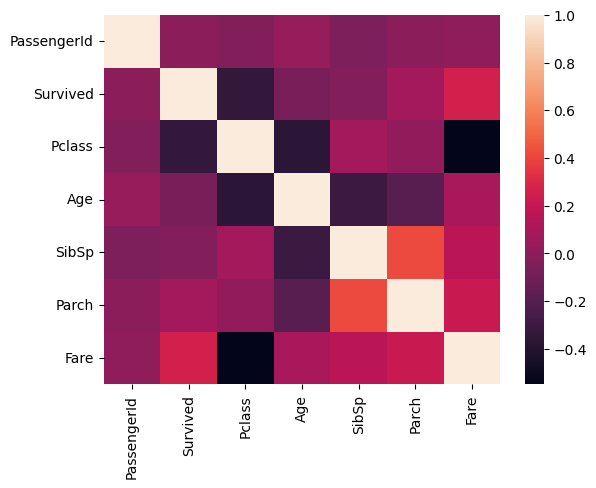

In [ ]:
sns.heatmap(data.corr())

<ipython-input-9-7383ca3dc119>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = data.corr()
<ipython-input-9-7383ca3dc119>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corrwith(data.PassengerId))


PassengerId    1.000000
Survived      -0.005007
Pclass        -0.035144
Age            0.036847
SibSp         -0.057527
Parch         -0.001652
Fare           0.012658
Name: PassengerId, dtype: float64
PassengerId    1.000000
Survived      -0.005007
Pclass        -0.035144
Age            0.036847
SibSp         -0.057527
Parch         -0.001652
Fare           0.012658
dtype: float64
[[<Axes: title={'center': 'PassengerId'}>
  <Axes: title={'center': 'Survived'}> <Axes: title={'center': 'Pclass'}>]
 [<Axes: title={'center': 'Age'}> <Axes: title={'center': 'SibSp'}>
  <Axes: title={'center': 'Parch'}>]
 [<Axes: title={'center': 'Fare'}> <Axes: > <Axes: >]]


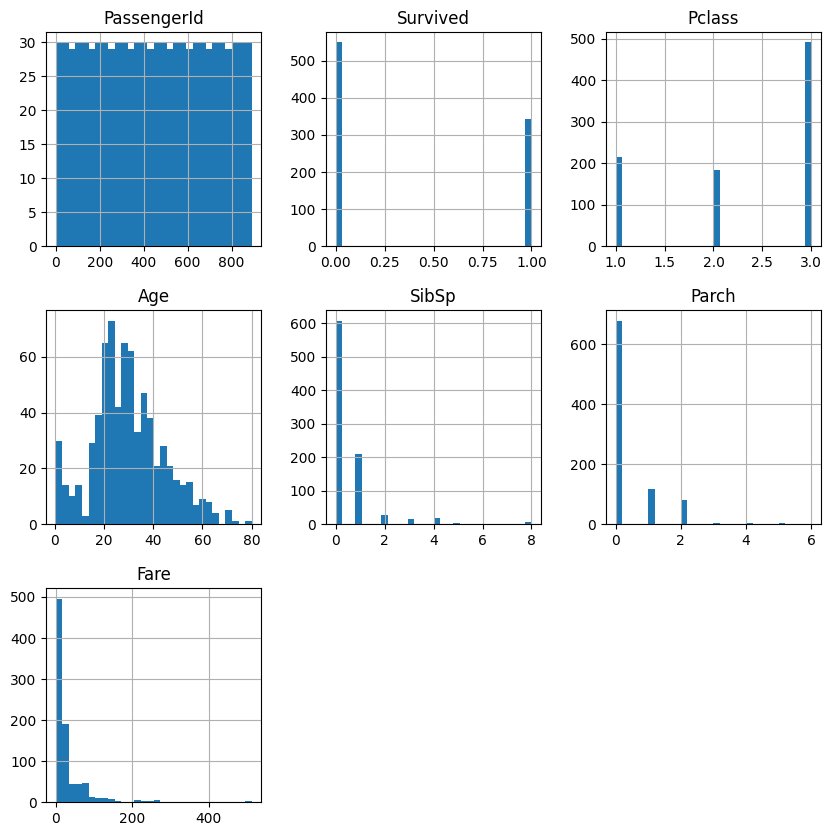

In [ ]:
cor_matrix = data.corr()
print(cor_matrix.PassengerId)
print(data.corrwith(data.PassengerId))
print(data.hist(figsize = (10,10), bins = 30))

In [ ]:
c={'Sex': {'male':0,'female': 1},
   'Embarked': {'S':-1,'C':0,'Q':1}}
datan=data.replace(c)
datan=datan.drop(['Name', 'Cabin','Ticket'], axis=1)
datan["Age"]=datan["Age"].fillna(datan["Age"].mean())
datan = datan.dropna()

In [ ]:
X = datan.drop('Survived', axis=1)
y = datan['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
precision = precision_score(y_test, y_predicted)
print(precision)

recall = recall_score(y_test, y_predicted)
print(recall)

f1 = f1_score(y_test, y_predicted)
print(f1)

confusion = confusion_matrix(y_test, y_predicted)
print(confusion)

0.6796116504854369
0.6730769230769231
0.676328502415459
[[130  33]
 [ 34  70]]


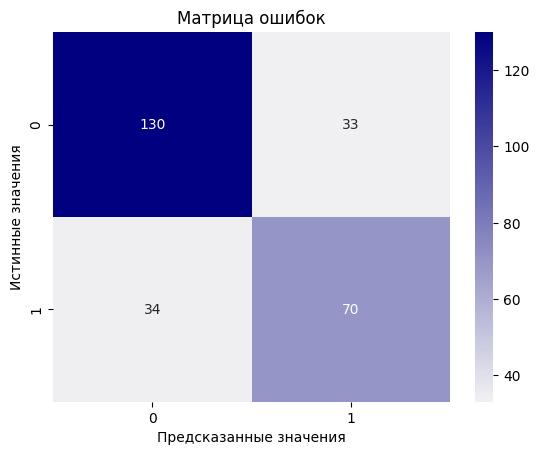

In [ ]:
classes = unique_labels(y_test, y_predicted)

cmap = sns.light_palette("navy", as_cmap=True)

sns.heatmap(confusion, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)

plt.title('Матрица ошибок')
plt.xlabel('Предсказанные значения')
plt.ylabel('Истинные значения')
plt.show()

In [ ]:
logreg_model = LogisticRegression(random_state=42)

y_cv_pred = cross_val_predict(logreg_model, X, y, cv=5)

accuracy_cv = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy').mean()
print(accuracy_cv)

precision_cv = precision_score(y, y_cv_pred)
print(precision_cv)

recall_cv = recall_score(y, y_cv_pred)
print(recall_cv)

f1_cv = f1_score(y, y_cv_pred)
print(f1_cv)

conf_matrix_cv = confusion_matrix(y, y_cv_pred)
print(conf_matrix_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7998032120865867
0.7718120805369127
0.6764705882352942
0.7210031347962383
[[481  68]
 [110 230]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
